<a href="https://colab.research.google.com/github/TIANBOQIU/AppliedDeepLearning/blob/master/MIT_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar

# Download the class repository
! git clone https://github.com/aamini/introtodeeplearning_labs.git  > /dev/null 2>&1
% cd introtodeeplearning_labs 
! git pull
% cd .. 

# Import the necessary class-specific utility files for this lab
import introtodeeplearning_labs as util

/content/introtodeeplearning_labs
Already up to date.
/content


In [2]:
# Data : MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


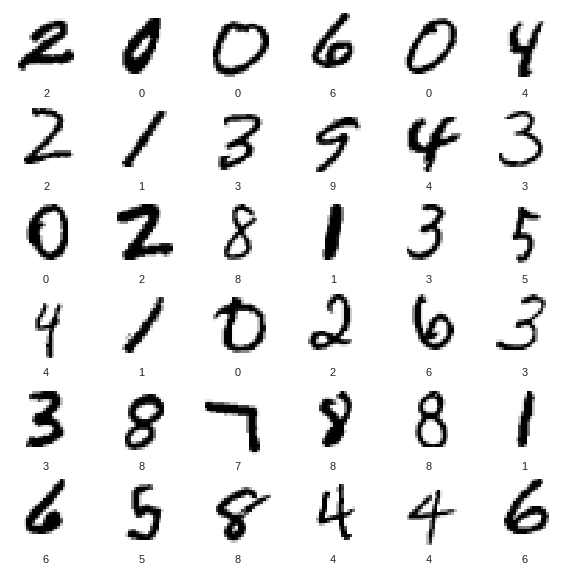

In [8]:
# Visualize the data set 
# 28 * 28 gray images
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])

In [0]:
# Fully connected neural network architecture
def build_fc_model():
  fc_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

# define loss, optimizer, and metrics
# categorical classification model
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
BATCH_SIZE = 64
EPOCHS = 5

In [12]:
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3674 - acc: 0.8968
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1965 - acc: 0.9443
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1482 - acc: 0.9579
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1213 - acc: 0.9658
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1023 - acc: 0.9709


In [13]:
# evaluate accuracy on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 85us/sample - loss: 0.1039 - acc: 0.9695
('Test accuracy:', 0.9695)


In [14]:
# Define the CNN model
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(filters=36,kernel_size=(3,3),activation=tf.nn.relu),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return cnn_model

cnn_model = build_cnn_model()
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

In [0]:
cnn_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [17]:
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2472 - acc: 0.9226
Epoch 2/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0695 - acc: 0.9789
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0493 - acc: 0.9846
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0378 - acc: 0.9883
Epoch 5/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0312 - acc: 0.9904


In [19]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print('test accuracy', test_acc)

10000/10000 [==============================] - 1s 108us/sample - loss: 0.0359 - acc: 0.9886
('test accuracy', 0.9886)


In [0]:
# make predictions
predictions = cnn_model.predict(test_images)

In [23]:
print(predictions[0])

[2.8298011e-10 3.7075929e-09 8.6334229e-10 9.3398148e-07 4.8338494e-10
 1.5912913e-10 3.7097959e-15 9.9999893e-01 4.5709345e-10 6.2364229e-08]


In [24]:
np.argmax(predictions[0])

7

In [25]:
np.argmax([1,2,3])

2

In [26]:
test_labels[0]

7

In [0]:
# visualize the classification results on the MNIST dataset
def plot_image(i, predictions_array, true_labels, img):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                      100*np.max(predictions_array),
                                      true_label),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

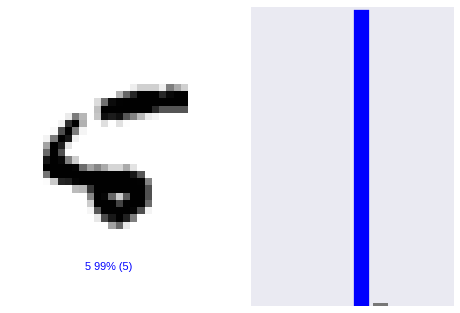

In [38]:
image_index = 8
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions, test_labels)

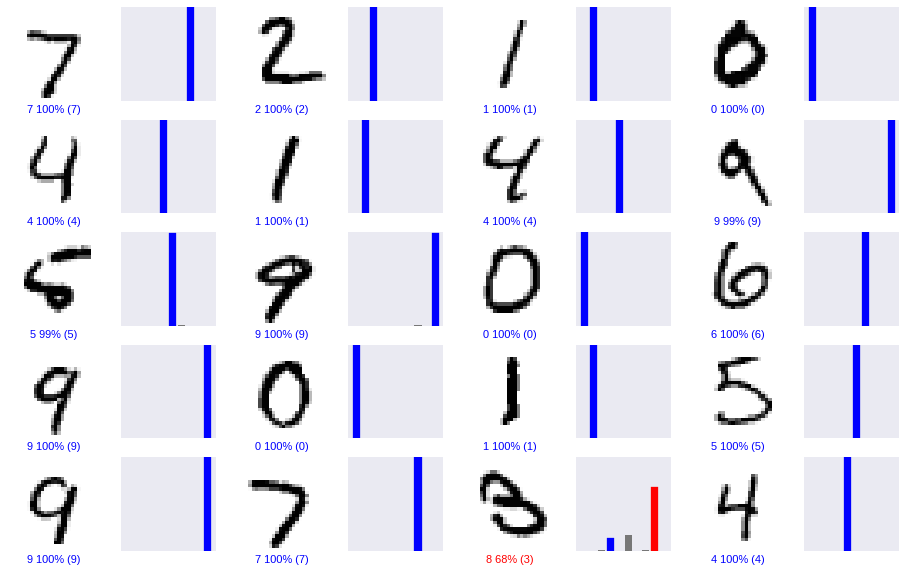

In [42]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

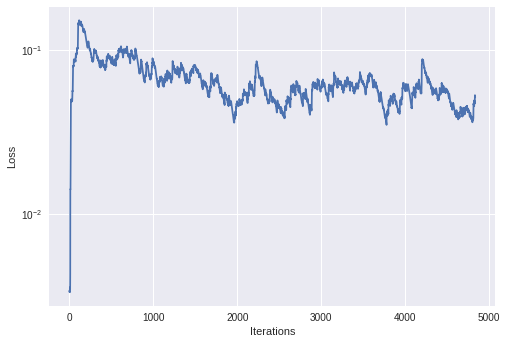

100%|#########################################################|Time:  0:01:04  


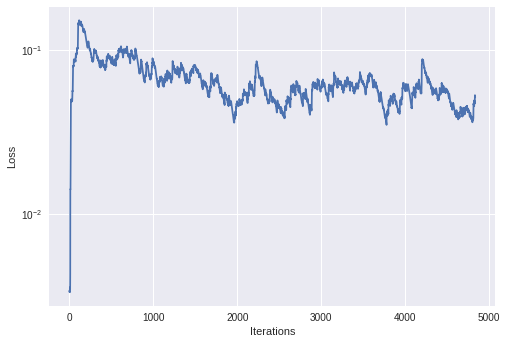

In [45]:
# rebuild the model in a lower level way
# get more control which will be valuable when building other models
# tf.GradientTap and tf.GradientTape.gradient

# Rebuild the CNN model
cnn_modell = build_cnn_model()

batch_size = 12
loss_history = util.LossHistory(smoothing_factor=0.99)
plotter = util.PeriodicPlotter(sec=2, xlabel='Iterations',ylabel='Loss', scale='semilogy')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)

bar = util.create_progress_bar()
# debug
loss_debug = 0
for idx in bar(range(0, train_images.shape[0], batch_size)):
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)
  
  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images) # feed forward
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits)
    # debug # loss_value has a shape of batch_size, then we take the average
    loss_debug = loss_value
    
  loss_history.append(loss_value.numpy().mean())
  plotter.plot(loss_history.get())
  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.variables)
  optimizer.apply_gradients(zip(grads, cnn_model.variables),
                           global_step=tf.train.get_or_create_global_step())